<a href="https://colab.research.google.com/github/NandhanaRameshkumar/Bayesian_Network/blob/main/Bayesian_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
# Define the dataset (replace with your actual data)
data = pd.DataFrame({
    'Sprinkler': ['sunny', 'sunny', 'cloudy', 'rainy'],
    'GrassWet': ['dry', 'wet', 'wet', 'wet'],
    'Rain': ['false', 'false', 'true', 'true']
})
model = BayesianModel([('Rain', 'Sprinkler'), ('Rain', 'GrassWet'), ('Sprinkler', 'GrassWet')])
cpd_rain = TabularCPD(variable='Rain', variable_card=2, values=[[0.8], [0.2]])
cpd_sprinkler = TabularCPD(variable='Sprinkler', variable_card=2, values=[[0.5, 0.8], [0.5, 0.2]], evidence=['Rain'], evidence_card=[2])
cpd_grasswet = TabularCPD(variable='GrassWet', variable_card=2, values=[[0.9, 0.1, 0.8, 0.2], [0.1, 0.9, 0.2, 0.8]], evidence=['Rain', 'Sprinkler'], evidence_card=[2, 2])
# Add CPDs to the model
model.add_cpds(cpd_rain, cpd_sprinkler, cpd_grasswet)
# Check model for consistency
print(model.check_model())
# Create an inference object
inference = VariableElimination(model)
# Print the structure of the network
print(model)
# Example query: What is the probability of grass being wet given it's raining?
query = ['GrassWet']
evidence = {'Rain': 1}  # Use numerical values for evidence: 1 for 'true', 0 for 'false'
posteriors = inference.query(variables=query, evidence=evidence)
print(posteriors)

True
BayesianModel with 3 nodes and 3 edges
+-------------+-----------------+
| GrassWet    |   phi(GrassWet) |
+=============+=================+
| GrassWet(0) |          0.6800 |
+-------------+-----------------+
| GrassWet(1) |          0.3200 |
+-------------+-----------------+


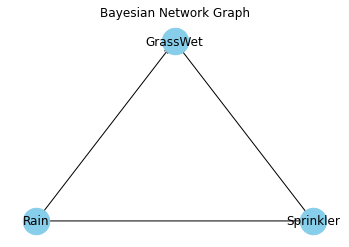

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph from the Bayesian network structure
graph = nx.DiGraph(model.edges())

# Set node positions based on a hierarchical layout
pos = nx.planar_layout(graph)

# Draw nodes
nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(graph, pos, arrows=True, arrowstyle='->', arrowsize=10)

# Add labels to nodes
nx.draw_networkx_labels(graph, pos, font_size=12, font_family='sans-serif')

# Display the graph
plt.title('Bayesian Network Graph')
plt.axis('off')
plt.show()
